 Datasets : [Our World In Data - OWID CSV](https://github.com/owid/covid-19-data/tree/master/public/data/owid-covid-data.csv)


 Variables and Their Meanings : [CodeBook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

 
 Today's Data : [Date](https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
data.replace(np.nan,0 , inplace = True)
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
82501,ZWE,Africa,Zimbabwe,2021-04-14,37369.0,39.0,55.000,1548.0,5.0,2.429,2514.242,2.624,3.700,104.152,0.336,0.163,1.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2375.0,462372.0,31.109,0.16,1873.0,0.126,0.029,34.1,tests performed,262128.0,231632.0,30496.0,13773.0,11816.0,1.76,1.56,0.21,795.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82502,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,2517.808,3.566,3.556,104.286,0.135,0.173,1.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82503,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82504,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82505,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.499,4.450,104.488,0.067,0.144,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [5]:
z = data['continent'].value_counts().index.values

In [6]:
ct=0
for i in data[data.continent != 0].location.value_counts().index.values:
  if(i in z):
    ct+=1
print(ct)

0


In [7]:
continent_wise = data[data.continent == 0]
data = data[data.continent != 0]

**<h2> Exploratory Data Analysis </h2>**

In [8]:
def trajectories(first , second , titleplus = "", hue = None ,ci=True):
    fig,ax = plt.subplots(ncols = 2, figsize = (10,5) , dpi = 100)
    plt.tight_layout(pad=5.0)
    if ci:
        sns.lineplot(x = first['date'].dt.month , y = first['new_cases'] ,ax = ax[0], color = 'green' ,hue=hue, label = '2020')
        sns.lineplot(x = second['date'].dt.month , y = second['new_cases'] ,ax = ax[1], color = 'red' ,hue=hue, label = '2021')
    else:
        sns.lineplot(x = first['date'].dt.month , y = first['new_cases'] ,ax = ax[0], color = 'green' ,hue=hue,ci = None, label = '2020')
        sns.lineplot(x = second['date'].dt.month , y = second['new_cases'] ,ax = ax[1], color = 'red' ,hue=hue,ci= None, label = '2021')
    for i in range(2):
        ax[i].tick_params(axis = 'x' , labelsize = 12)
        ax[i].tick_params(axis = 'y' , labelsize = 12)
        ax[i].set_xlabel('Months')
        ax[i].set_ylabel('New Cases')

    ax[0].set_title("Trajectory in 2020"+titleplus , fontsize = 15)
    ax[1].set_title("Trajectory in 2021"+titleplus , fontsize = 15)
    plt.legend()

**<h3> Analysis for India </h3>**

In [9]:
data_ind = data[data['location'] == 'India']
data_ind.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
33892,IND,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33893,IND,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33894,IND,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33895,IND,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33896,IND,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.002,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [10]:
data_ind_2020 = data_ind[data_ind['date'].dt.year == 2020]
data_ind_2021 = data_ind[data_ind['date'].dt.year == 2021]

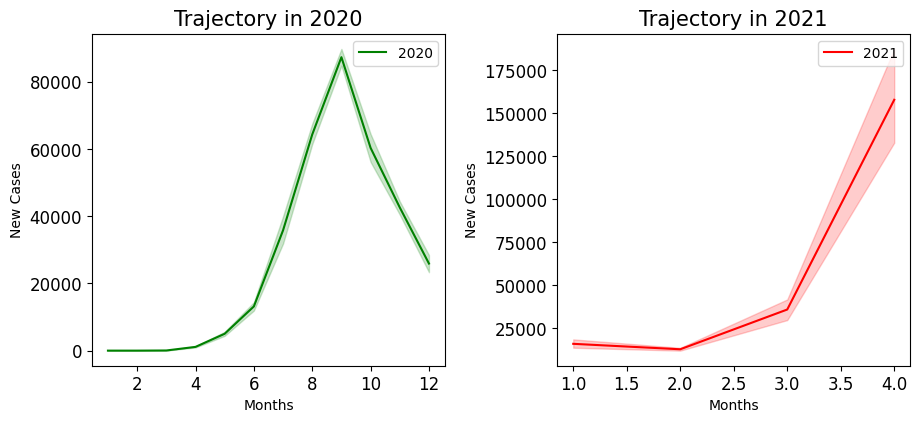

In [11]:
trajectories(data_ind_2020,data_ind_2021)

**New Cases in 2021**

Text(0.5, 1.0, 'New Cases in 2021')

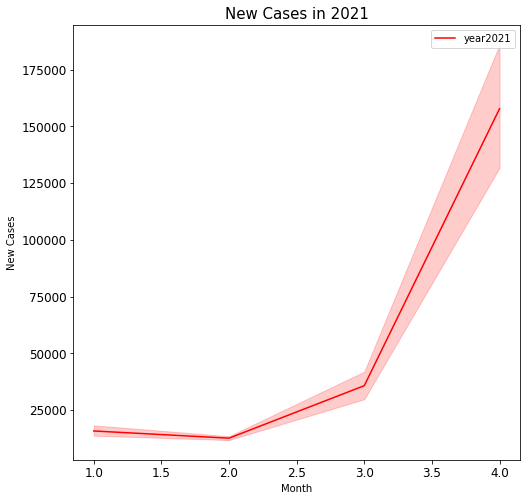

In [12]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['new_cases'] , color = 'red' , label = 'year2021')
plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend()
plt.title('New Cases in 2021', fontsize = 15)


**New Cases in 2020**

Text(0.5, 1.0, 'New Cases in 2020')

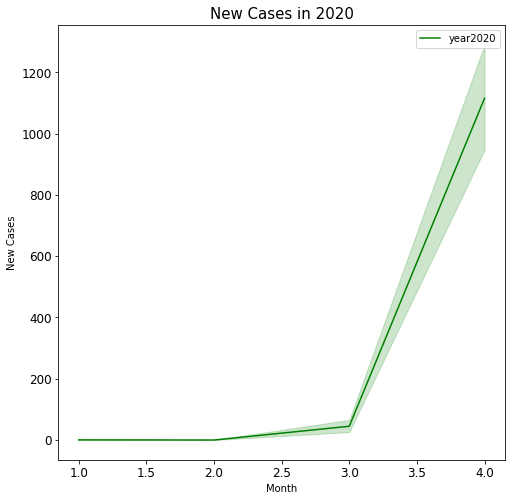

In [13]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind_2020[data_ind_2020['date'].dt.month<5]['date'].dt.month , y = data_ind_2020[data_ind_2020['date'].dt.month<5]['new_cases'].replace(np.nan,0) , color = 'green', label = 'year2020')
plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend()
plt.title('New Cases in 2020', fontsize = 15)


**New Cases (2021 v 2020)**

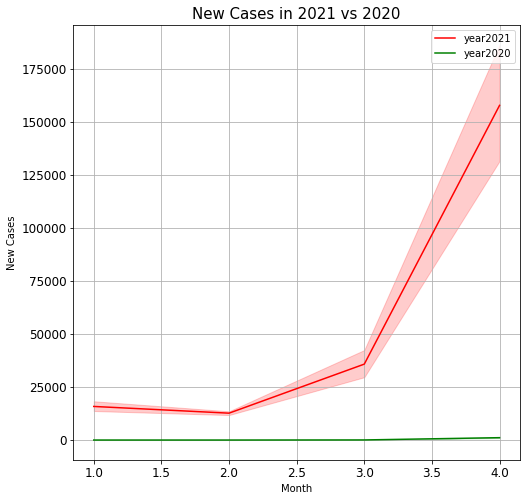

In [14]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['new_cases'] , color = 'red' , label = 'year2021')
sns.lineplot(x = data_ind_2020[data_ind_2020['date'].dt.month<5]['date'].dt.month , y = data_ind_2020[data_ind_2020['date'].dt.month<5]['new_cases'].replace(np.nan,0) , color = 'green', label = 'year2020')

plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend()
plt.title('New Cases in 2021 vs 2020', fontsize = 15)
plt.grid()


Text(0.5, 1.0, 'New Cases in 2021 vs 2020 Log Scale')

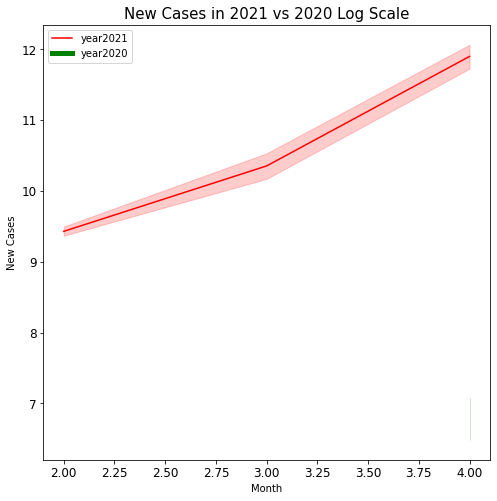

In [15]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['new_cases'].apply(np.log) , color = 'red' , label = 'year2021')
sns.lineplot(x = data_ind_2020[data_ind_2020['date'].dt.month<5]['date'].dt.month , y = data_ind_2020[data_ind_2020['date'].dt.month<5]['new_cases'].replace(np.nan,0).apply(np.log) , color = 'green',linewidth = 5, label = 'year2020')
plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend()
plt.title('New Cases in 2021 vs 2020 Log Scale', fontsize = 15)
#plt.grid()


**Vaccinations**

Text(0.5, 1.0, 'Vaccinations')

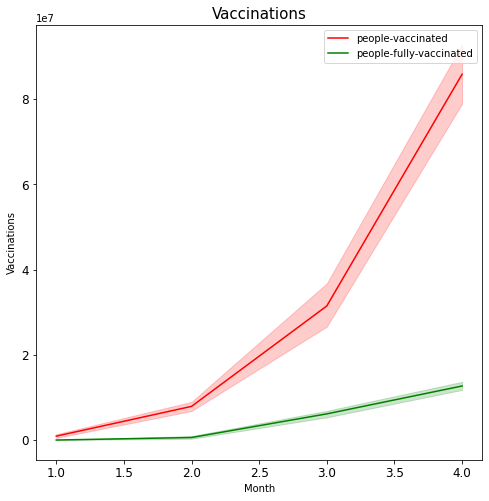

In [16]:
plt.figure(figsize=(8,8))
#sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['new_vaccinations'] , color = 'purple' , label = "new-vaccinations")
sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['people_vaccinated'] , color = 'red' , label = "people-vaccinated")
sns.lineplot(x = data_ind_2021['date'].dt.month , y = data_ind_2021['people_fully_vaccinated'] , color = 'green', label = 'people-fully-vaccinated')
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('Vaccinations')
plt.title('Vaccinations', fontsize = 15)


**<h3> Continent Wise </h3>**

In [17]:
continent_wise.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
420,OWID_AFR,0,Africa,2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,OWID_AFR,0,Africa,2020-02-14,1.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,OWID_AFR,0,Africa,2020-02-15,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,OWID_AFR,0,Africa,2020-02-16,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,OWID_AFR,0,Africa,2020-02-17,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.340598e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Trajectories in 2020 and 2021**

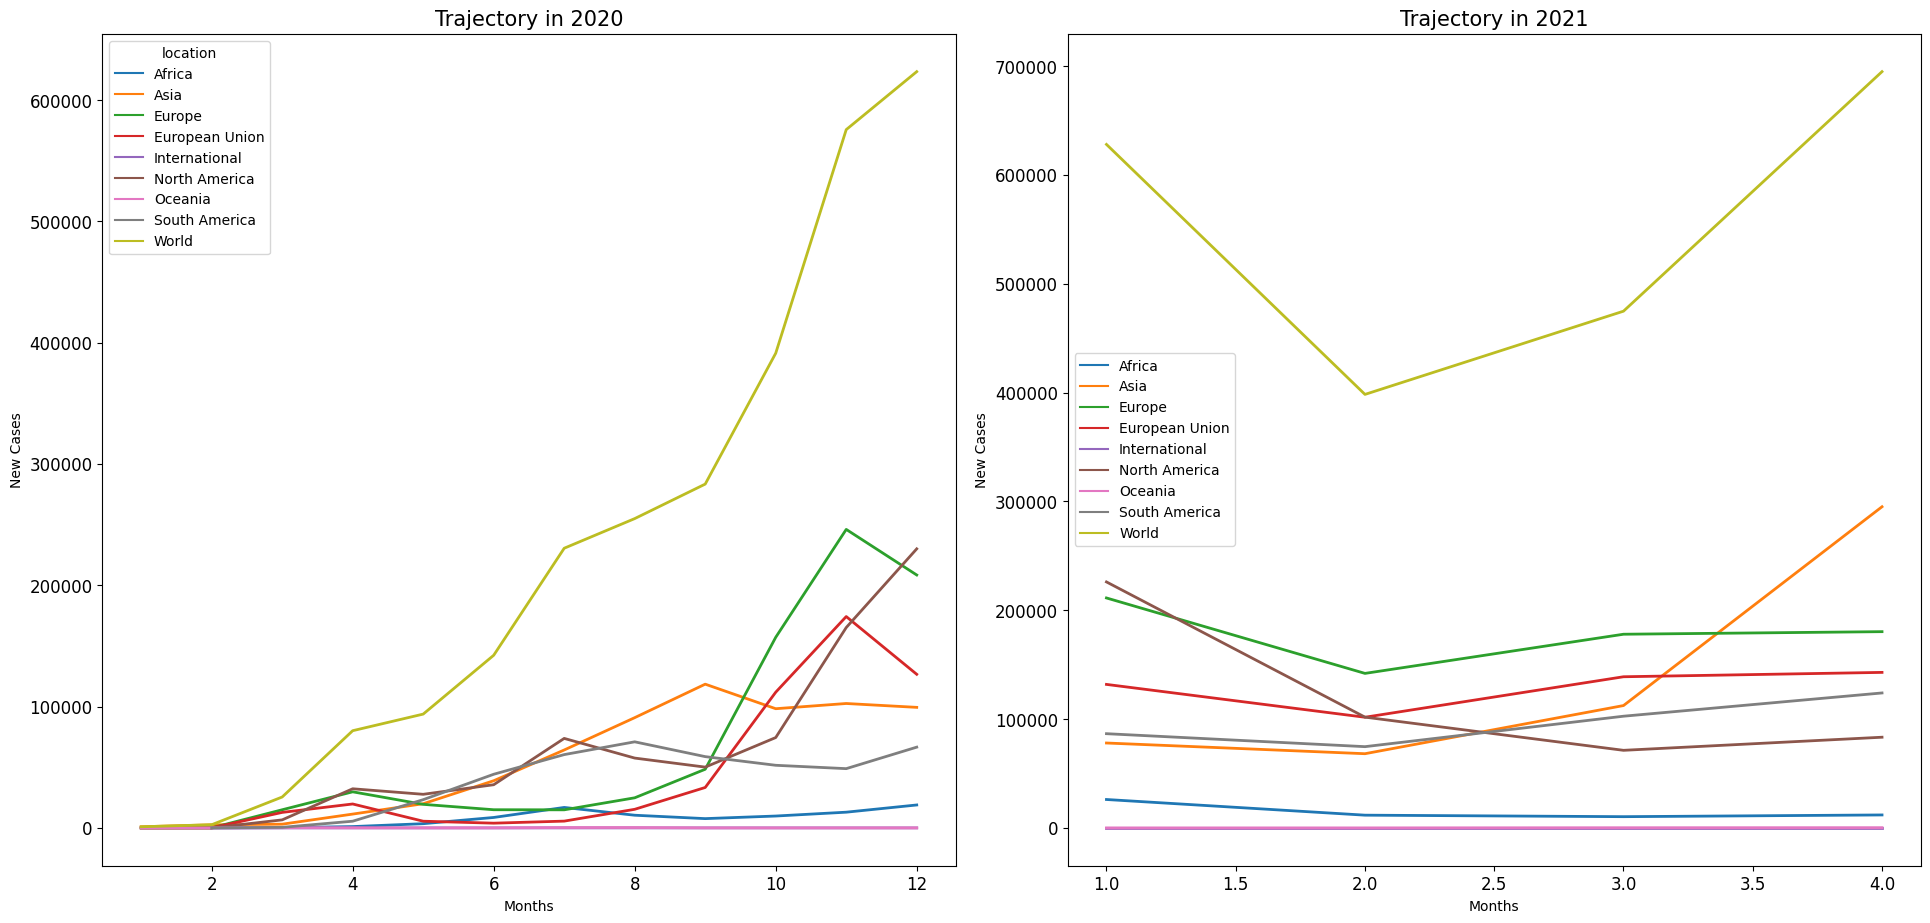

In [18]:
fig,ax = plt.subplots(ncols = 2, figsize = (20,10) , dpi = 100)
plt.tight_layout(pad=5.0)
sns.lineplot(x = continent_wise[continent_wise['date'].dt.year == 2020]['date'].dt.month , y = continent_wise['new_cases'] , hue = continent_wise['location'] , ci = None , ax=ax[0] , linewidth = 2)
sns.lineplot(x = continent_wise[continent_wise['date'].dt.year == 2021]['date'].dt.month , y = continent_wise['new_cases'], hue = continent_wise['location'] , ci = None , ax = ax[1] , linewidth = 2)
for i in range(2):
    ax[i].tick_params(axis = 'x' , labelsize = 12)
    ax[i].tick_params(axis = 'y' , labelsize = 12)
    ax[i].set_xlabel('Months')
    ax[i].set_ylabel('New Cases')

ax[0].set_title("Trajectory in 2020" , fontsize = 15)
ax[1].set_title("Trajectory in 2021" , fontsize = 15)
plt.legend()

**Vaccinations**

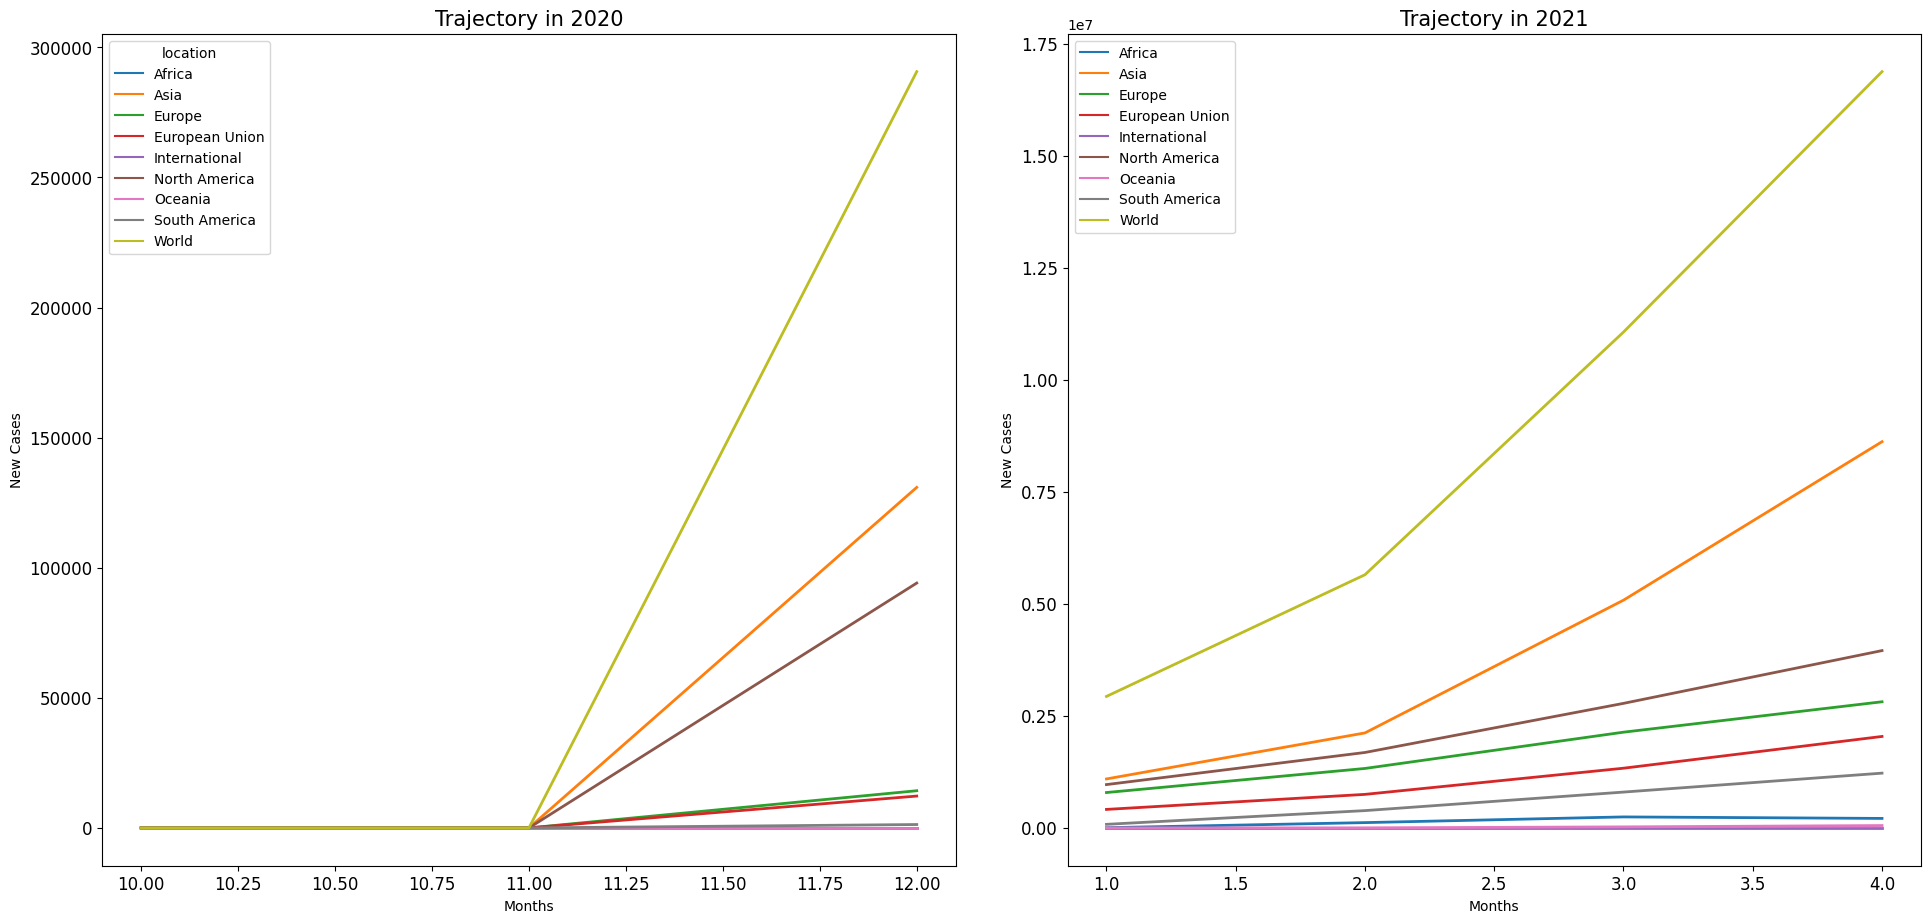

In [19]:
c_2020 = continent_wise[continent_wise['date'].dt.year == 2020]
fig,ax = plt.subplots(ncols = 2, figsize = (20,10) , dpi = 100)
plt.tight_layout(pad=5.0)
sns.lineplot(x = c_2020[c_2020['date'].dt.month >= 10]['date'].dt.month , y = c_2020['new_vaccinations'] , hue = continent_wise['location'] , ci = None , ax=ax[0] , linewidth = 2)
sns.lineplot(x = continent_wise[continent_wise['date'].dt.year == 2021]['date'].dt.month , y = continent_wise[continent_wise['date'].dt.year == 2021]['new_vaccinations'], hue = continent_wise['location'] , ci = None , ax = ax[1] , linewidth = 2)
for i in range(2):
    ax[i].tick_params(axis = 'x' , labelsize = 12)
    ax[i].tick_params(axis = 'y' , labelsize = 12)
    ax[i].set_xlabel('Months')
    ax[i].set_ylabel('New Cases')

ax[0].set_title("Trajectory in 2020" , fontsize = 15)
ax[1].set_title("Trajectory in 2021" , fontsize = 15)
plt.legend()

**Correlation**

Doesn't Imply Causation

Note : try MI maybe

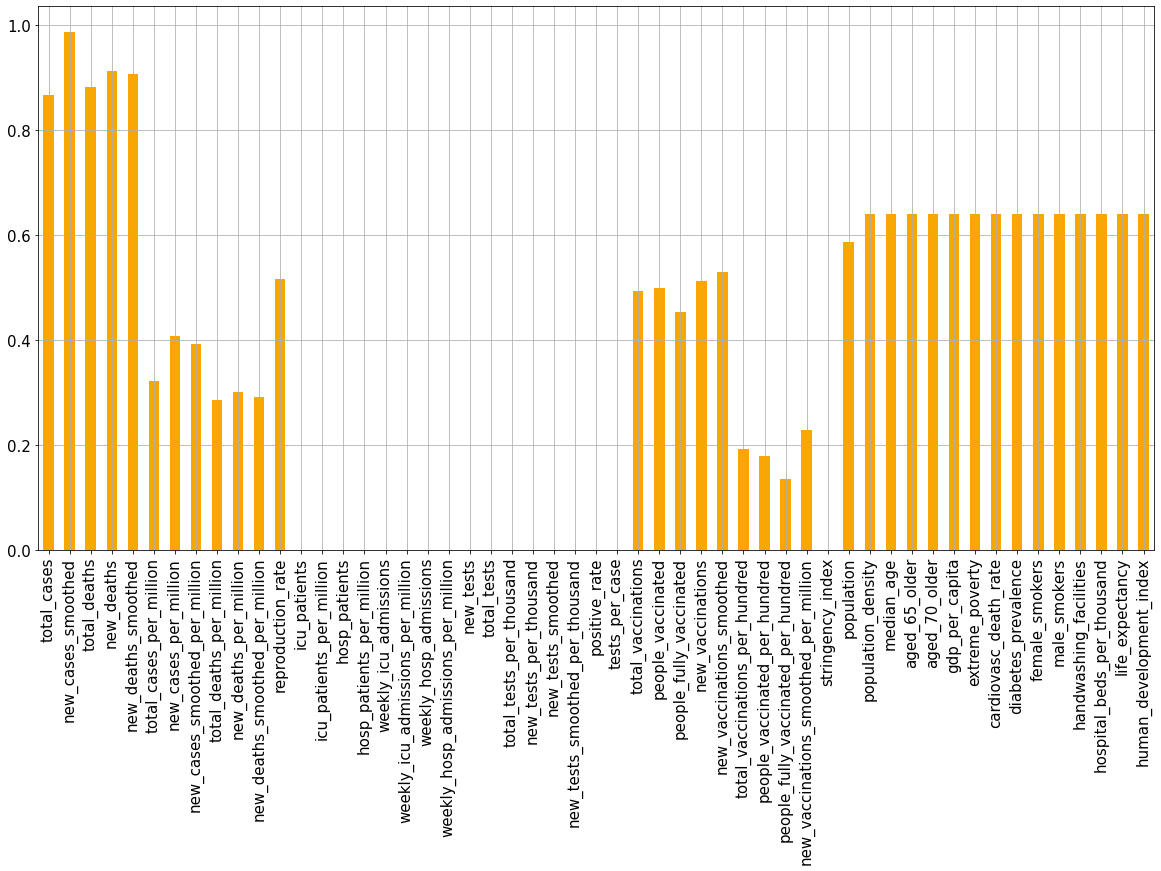

In [20]:
variables = continent_wise.drop(['new_cases'] , axis = 1)
target = continent_wise['new_cases']
variables.corrwith(target).plot.bar(figsize=(20,10),color ='#f9a602',fontsize=15,rot=90,grid=True)

**<h3> Analysis for the Top 5 </h3>**

In [21]:
data_usa = data[data['location'] == 'United States']
data_uk = data[data['location'] == 'United Kingdom']
data_brazil = data[data['location'] == 'Brazil']
data_russia = data[data['location'] == 'Russia']
data_france = data[data['location'] == 'France']

**Total Cases**

Text(0.5, 1.0, 'Total Cases Countrywise in 2021')

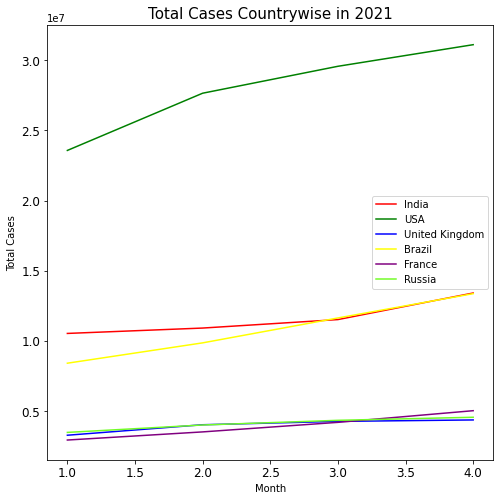

In [22]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind[data_ind['date'].dt.year == 2021]['date'].dt.month , y = data_ind[data_ind['date'].dt.year == 2021]['total_cases'],ci=None , color = 'Red' , label = 'India')
sns.lineplot(x = data_usa[data_usa['date'].dt.year == 2021]['date'].dt.month , y = data_usa[data_usa['date'].dt.year == 2021]['total_cases'] ,ci=None, color = 'Green', label = 'USA')
sns.lineplot(x = data_uk[data_uk['date'].dt.year == 2021]['date'].dt.month , y = data_uk[data_uk['date'].dt.year == 2021]['total_cases'] ,ci=None , color = 'Blue', label = 'United Kingdom')
sns.lineplot(x = data_brazil[data_brazil['date'].dt.year == 2021]['date'].dt.month , y = data_brazil[data_brazil['date'].dt.year == 2021]['total_cases'] ,ci=None , color = 'Yellow' , label = 'Brazil')
sns.lineplot(x = data_france[data_france['date'].dt.year == 2021]['date'].dt.month , y = data_france[data_france['date'].dt.year == 2021]['total_cases'] ,ci=None , color = 'Purple' , label = 'France')
sns.lineplot(x = data_russia[data_russia['date'].dt.year == 2021]['date'].dt.month , y = data_russia[data_russia['date'].dt.year == 2021]['total_cases'] ,ci=None , color = '#73fc26', label = 'Russia')
plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend()
plt.title('Total Cases Countrywise in 2021', fontsize = 15)


Text(0.5, 1.0, 'Total Cases 2021(Logarithm) ')

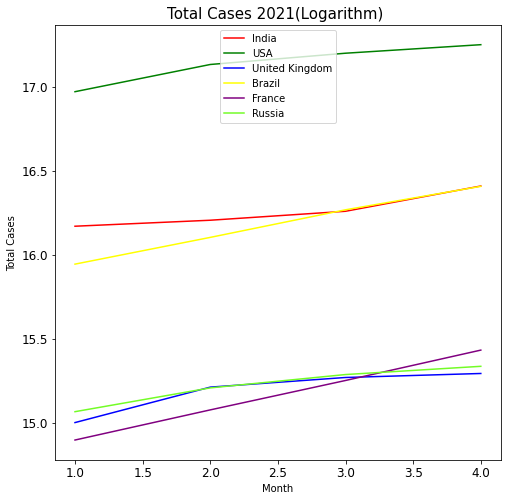

In [23]:
plt.figure(figsize=(8,8))
sns.lineplot(x = data_ind[data_ind['date'].dt.year == 2021]['date'].dt.month , y = data_ind[data_ind['date'].dt.year == 2021]['total_cases'].apply(np.log),ci=None , color = 'Red' , label = 'India')
sns.lineplot(x = data_usa[data_usa['date'].dt.year == 2021]['date'].dt.month , y = data_usa[data_usa['date'].dt.year == 2021]['total_cases'].apply(np.log) ,ci=None, color = 'Green', label = 'USA')
sns.lineplot(x = data_uk[data_uk['date'].dt.year == 2021]['date'].dt.month , y = data_uk[data_uk['date'].dt.year == 2021]['total_cases'].apply(np.log) ,ci=None , color = 'Blue', label = 'United Kingdom')
sns.lineplot(x = data_brazil[data_brazil['date'].dt.year == 2021]['date'].dt.month , y = data_brazil[data_brazil['date'].dt.year == 2021]['total_cases'].apply(np.log) ,ci=None , color = 'Yellow' , label = 'Brazil')
sns.lineplot(x = data_france[data_france['date'].dt.year == 2021]['date'].dt.month , y = data_france[data_france['date'].dt.year == 2021]['total_cases'].apply(np.log) ,ci=None , color = 'Purple' , label = 'France')
sns.lineplot(x = data_russia[data_russia['date'].dt.year == 2021]['date'].dt.month , y = data_russia[data_russia['date'].dt.year == 2021]['total_cases'].apply(np.log) ,ci=None , color = '#73fc26', label = 'Russia')
plt.tick_params(axis = 'x',labelsize = 12)
plt.tick_params(axis = 'y' , labelsize = 12)
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend()
plt.title('Total Cases 2021(Logarithm) ', fontsize = 15)


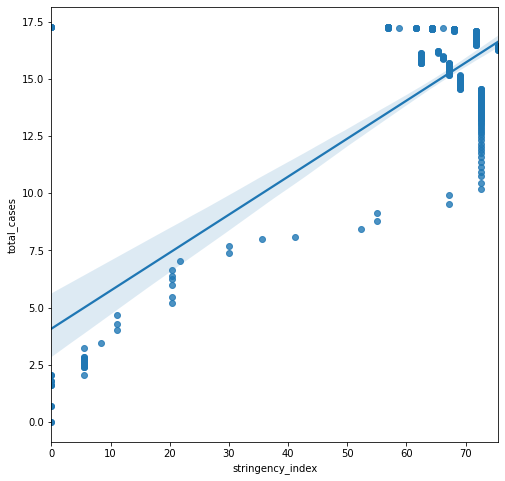

In [24]:
plt.figure(figsize = (8,8))
sns.regplot(y = data_usa['total_cases'].apply(np.log),x = data_usa['stringency_index'])

**<h3> Exploring Specific Countries </h3>**

**Israel's Condition Before and After Vaccinations**

In [25]:
data_israel = data[data['location'] == 'Israel']
data_israel.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
36535,ISR,Asia,Israel,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,29.0,0.003,0.003,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,0.0,2.99,82.97,0.919
36536,ISR,Asia,Israel,2020-02-21,1.0,1.0,0.0,0.0,0.0,0.0,0.116,0.116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,57.0,0.007,0.003,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,0.0,2.99,82.97,0.919
36537,ISR,Asia,Israel,2020-02-22,1.0,0.0,0.0,0.0,0.0,0.0,0.116,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,70.0,0.008,0.002,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,0.0,2.99,82.97,0.919
36538,ISR,Asia,Israel,2020-02-23,1.0,0.0,0.0,0.0,0.0,0.0,0.116,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,126.0,0.015,0.006,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,0.0,2.99,82.97,0.919
36539,ISR,Asia,Israel,2020-02-24,1.0,0.0,0.0,0.0,0.0,0.0,0.116,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,201.0,0.023,0.009,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,0.0,2.99,82.97,0.919


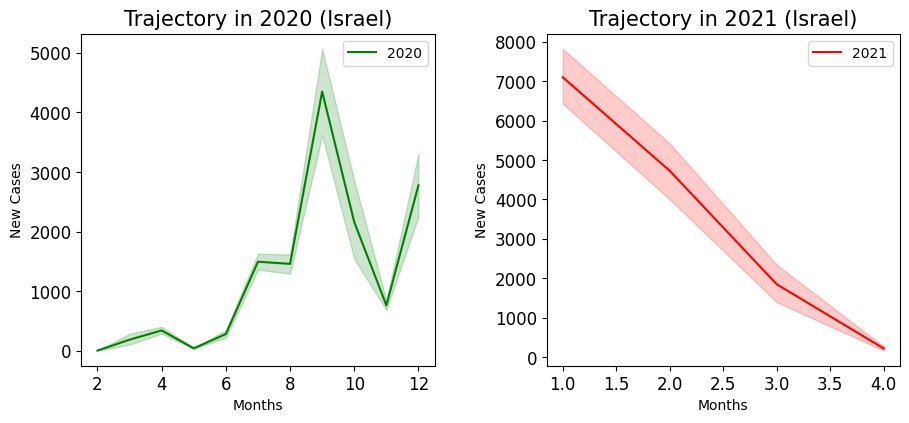

In [26]:
trajectories(data_israel[data_israel['date'].dt.year == 2020],data_israel[data_israel['date'].dt.year == 2021],titleplus=" (Israel)")

**New Zealand**

In [27]:
data_nz = data[data['location'] == 'New Zealand']

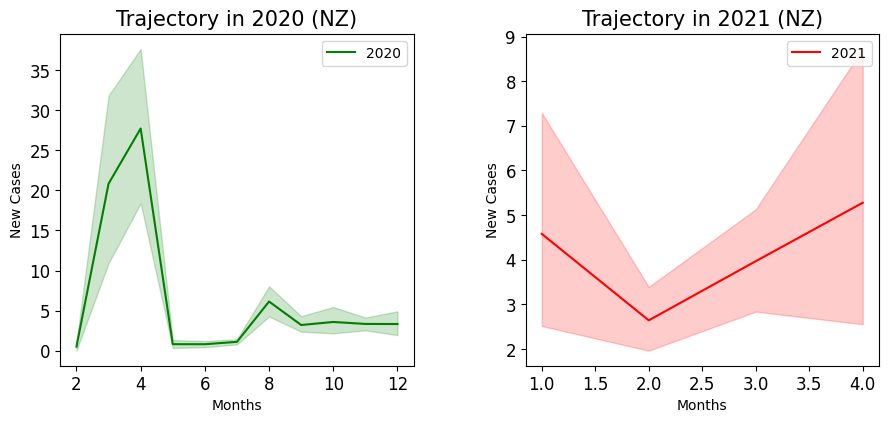

In [28]:
trajectories(data_nz[data_nz['date'].dt.year == 2020],data_nz[data_nz['date'].dt.year == 2021],titleplus=" (NZ)")

**Tanzania**

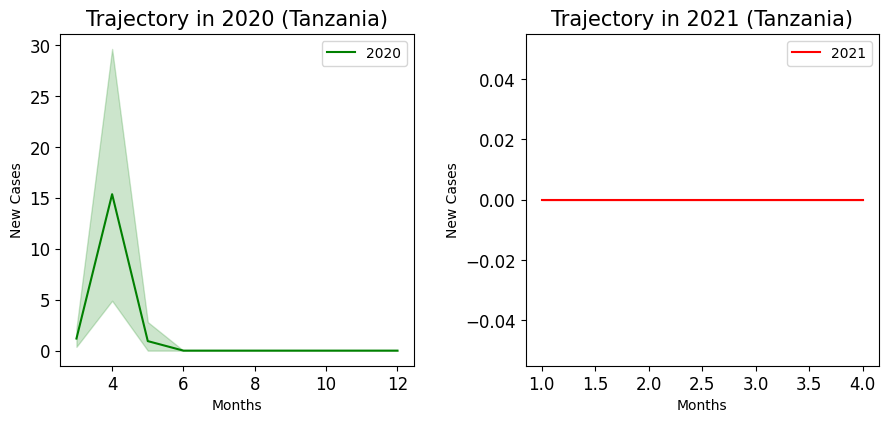

In [29]:
data_tz = data[data['location'] == 'Tanzania']
trajectories(data_tz[data_tz['date'].dt.year == 2020],data_tz[data_tz['date'].dt.year == 2021],titleplus=" (Tanzania)")

**Vatican**

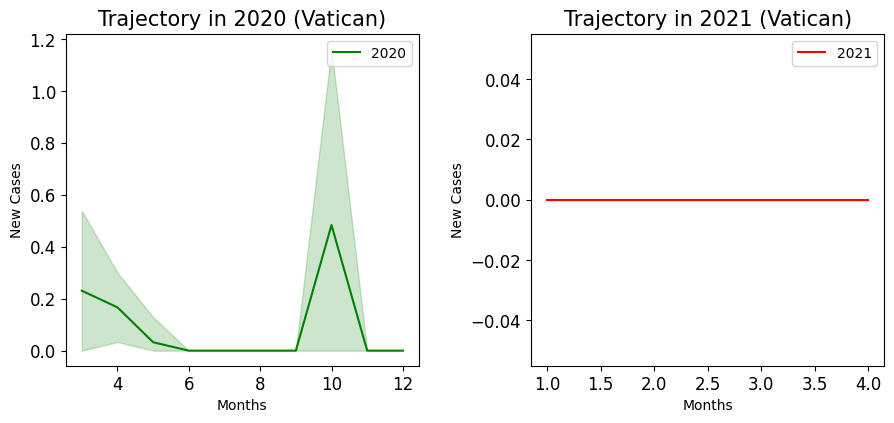

In [30]:
data_tz = data[data['location'] == 'Vatican']
trajectories(data_tz[data_tz['date'].dt.year == 2020],data_tz[data_tz['date'].dt.year == 2021],titleplus=" (Vatican)")

**<h3> Visualizing Gravity of Threat via Plotly </h3>**

In [31]:
latest_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv").replace(np.nan,0)
latest_data = latest_data[latest_data['continent'] != 0]
latest_data = latest_data[['iso_code','location','new_cases']]
latest_data.head()

,iso_code,location,new_cases
0,AFG,Afghanistan,72.0
2,ALB,Albania,138.0
3,DZA,Algeria,156.0
4,AND,Andorra,34.0
5,AGO,Angola,89.0


In [32]:
def transformation(x):
    return np.log(x+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


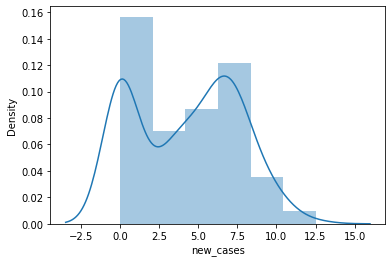

In [33]:
latest_data['new_cases'] = latest_data['new_cases'].apply(transformation)
sns.distplot(latest_data['new_cases'])

In [34]:
data_maps = data[['iso_code','date','location','new_cases']]
data_maps['new_cases'] = data_maps['new_cases'].apply(np.log).replace(np.log(0),0)
data_maps.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,date,location,new_cases
0,AFG,2020-02-24,Afghanistan,0.0
1,AFG,2020-02-25,Afghanistan,0.0
2,AFG,2020-02-26,Afghanistan,0.0
3,AFG,2020-02-27,Afghanistan,0.0
4,AFG,2020-02-28,Afghanistan,0.0


In [35]:
april_15_2020 = data_maps[data_maps['date'] == '2020-04-15']

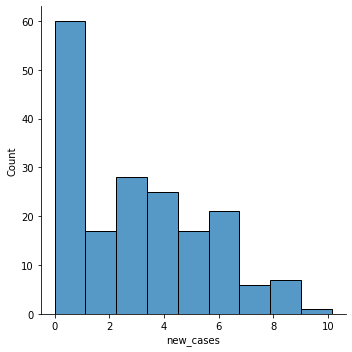

In [36]:
sns.displot(april_15_2020['new_cases'])

**Date 15 April 2020 | New Cases**

In [37]:
import plotly.express as px
fig = px.choropleth(april_15_2020, locations='iso_code', color='new_cases',
                           hover_name = "location",
                           color_continuous_scale="Viridis",
                           range_color=(-2, 10),
                           scope="world",
                           labels={'new_cases':'New Cases'},
                           hover_data = ['location','new_cases']
                          )
fig.update_layout(title_text="Heat Map - New Cases - 15 April 2020")
fig.update_coloraxes(colorbar_title="<b>Color</b><br>New Cases<br>Log Scale")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Date : 16 April 2021 | New Cases**

In [38]:
fig = px.choropleth(latest_data, locations='iso_code', color='new_cases',
                           hover_name = "location",
                           color_continuous_scale="Viridis",
                           range_color=(-2.5, 15),
                           scope="world",
                           labels={'new_cases':'New Cases'},
                           hover_data = ['location','new_cases']
                          )
fig.update_layout(title_text="Heat Map - New Cases - 15 April 2021")
fig.update_coloraxes(colorbar_title="<b>Color</b><br>New Cases<br>Log Scale")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [39]:
 data_maps[data_maps['date'].dt.year == 2020]

,iso_code,date,location,new_cases
0,AFG,2020-02-24,Afghanistan,0.000000
1,AFG,2020-02-25,Afghanistan,0.000000
2,AFG,2020-02-26,Afghanistan,0.000000
3,AFG,2020-02-27,Afghanistan,0.000000
4,AFG,2020-02-28,Afghanistan,0.000000
...,...,...,...,...
82393,ZWE,2020-12-27,Zimbabwe,4.736198
82394,ZWE,2020-12-28,Zimbabwe,4.262680
82395,ZWE,2020-12-29,Zimbabwe,5.176150
82396,ZWE,2020-12-30,Zimbabwe,5.703782
